In [135]:
import time
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten, Activation
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras.datasets import mnist
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
    
import tensorflow as tf
import multiprocessing as mp

# Image Classification
In this project, you'll classify images from the [Mnist dataset](http://yann.lecun.com/exdb/mnist/).  The dataset consists of numbers 0-9. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [Mnist dataset for python](http://yann.lecun.com/exdb/mnist/).

In [121]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [122]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')
class_names = y_train
num_classes = 10

Print figure with 10 random images from cifar dataset

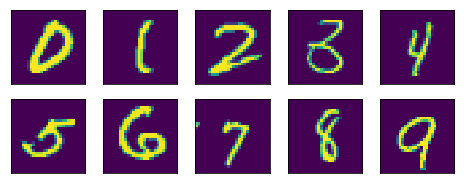

In [123]:
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    img = features_idx[img_num]
    plt.imshow(img[0])
plt.show()

It’s good practice to work with normalized data. Because the input values are well understood, we can easily normalize to the range 0 to 1 by dividing each value by the maximum observation which is 255. Note, the data is loaded as integers, so we must cast it to floating point values in order to perform the division.

In [124]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize inputs from 0-255 to 0-1
x_train  /= 255
x_test /= 255
num_classes = y_test.shape[1]

# Keras Model

### Smaller Model

In [125]:
def base_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

Then we can fit this model with 100 epochs and a batch size of 32

In [126]:
# Declare variables
batch_size = 128 
# 128 examples in a mini-batch, smaller batch size means more updates in one epoch
num_classes = 10 #
epochs = 10 # repeat 100 times

In [127]:
# Build model
sm_model = base_model()
sm_model.summary()
# Fit model
sm_cnn = sm_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 24, 24)        832       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________
Trai

In [136]:
sequential_model_to_ascii_printout(sm_model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####      1   28   28
              Conv2D    \|/  -------------------       832     0.1%
                relu   #####     32   24   24
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     32   12   12
             Dropout    | || -------------------         0     0.0%
                       #####     32   12   12
             Flatten   ||||| -------------------         0     0.0%
                       #####        4608
               Dense   XXXXX -------------------    589952    99.6%
                relu   #####         128
               Dense   XXXXX -------------------      1290     0.2%
             softmax   #####          10


### Larger Model

In [128]:
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [129]:
# Build model
lg_model = larger_model()
lg_model.summary()
# Fit model
lg_cnn = lg_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),  shuffle=True, verbose=2)
# Final evaluation of the model
scores = lg_model.evaluate(x_test, y_test, verbose=0)
print("Larger CNN Model Error: %.2f%%" % (100-scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 375)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               48128     
__________

In [137]:
sequential_model_to_ascii_printout(lg_model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####      1   28   28
              Conv2D    \|/  -------------------       780     1.3%
                relu   #####     30   24   24
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     30   12   12
              Conv2D    \|/  -------------------      4065     6.8%
                relu   #####     15   10   10
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     15    5    5
             Dropout    | || -------------------         0     0.0%
                       #####     15    5    5
             Flatten   ||||| -------------------         0     0.0%
                       #####         375
               Dense   XXXXX -------------------     48128    80.3%
                relu   #####         128
               Dense   XXXXX -------------------      6450    10.8%
                relu   #

## Statistics and Analysis

Smaller Model

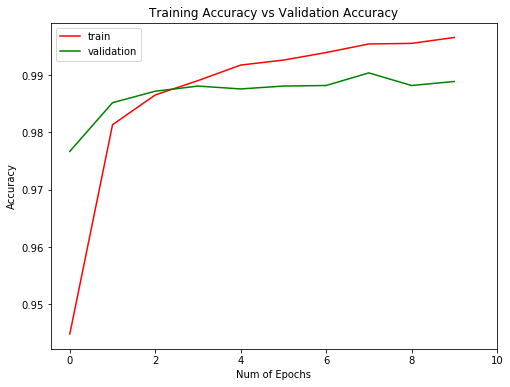

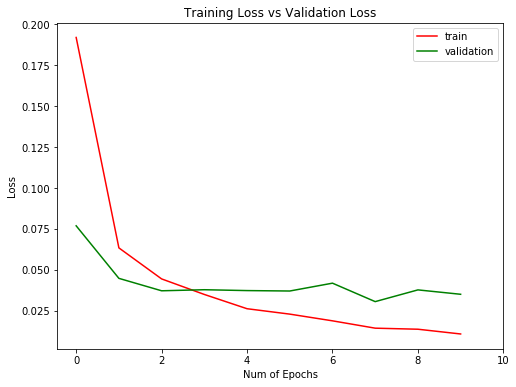

In [133]:
plt.figure(0)
plt.plot(sm_cnn.history['acc'],'r')
plt.plot(sm_cnn.history['val_acc'],'g')
plt.xticks(np.arange(0, epochs+1, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(sm_cnn.history['loss'],'r')
plt.plot(sm_cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, epochs+1, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

Larger Model

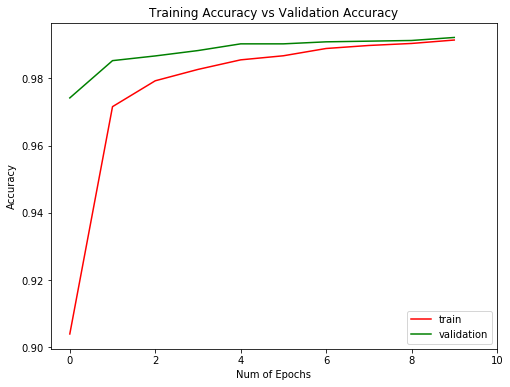

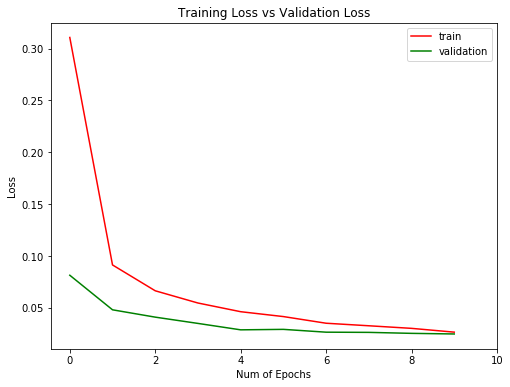

In [134]:
plt.figure(0)
plt.plot(lg_cnn.history['acc'],'r')
plt.plot(lg_cnn.history['val_acc'],'g')
plt.xticks(np.arange(0, epochs+1, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(lg_cnn.history['loss'],'r')
plt.plot(lg_cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, epochs+1, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()